<a href="https://colab.research.google.com/github/manmohanganesh/Playstore/blob/master/EDA_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis of Google Playstore Data
### **Author**    - Manmohan Ganesan


# **Project Summary -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. Explore and analyse the data to discover key factors responsible for app engagement and success.

# **GitHub Link -**

[My Project link](https://github.com/manmohanganesh/Playstore.git)

# **Problem Statement**


 Explore and analyse the data to discover key factors responsible for app engagement and success.

## ***1. Know Your Data***

### Import Libraries

In [62]:
# Import necessary Libraries

#For numerical analysis
import pandas as pd
import numpy as np

#For DataViz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#For mounting GDrive
from google.colab import drive

### Dataset Loading

In [63]:
# Mounting google Drive to the Colab Notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#loading the playstore data
playstore_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA PlayStore/Play Store Data.csv')

In [65]:
#Loading the userreview data
userreview_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA PlayStore/User Reviews.csv')


### Dataset First View

In [66]:
#First 5 elements of the dataset
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
#First 5 elements of the dataset
userreview_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [68]:
# Dataset Rows & Columns count
print("Playstore data's shape",playstore_data.shape)
print("User review's shape",userreview_data.shape)

Playstore data's shape (10841, 13)
User review's shape (64295, 5)


### Dataset Information

In [69]:
#Playstore_data Information
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [70]:
#userreview_data information
userreview_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [71]:
#Dataset Duplicate Value Count
playstore_data.duplicated().value_counts()

,count
False,10358
True,483


In [72]:
#Dropping all the duplicate values
playstore_data.drop_duplicates(inplace=True)

In [73]:
#Dropping all the duplicate values
userreview_data.duplicated().value_counts()

,count
True,33616
False,30679


In [74]:
#Dropping all the duplicate values
userreview_data.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [75]:
# Missing Values/Null Values Count
playstore_data.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [76]:
# Missing Values/Null Values Count
userreview_data.isnull().sum()

,0
App,0
Translated_Review,987
Sentiment,982
Sentiment_Polarity,982
Sentiment_Subjectivity,982


####Chart 1 - Heatmap : Multivariate Analysis

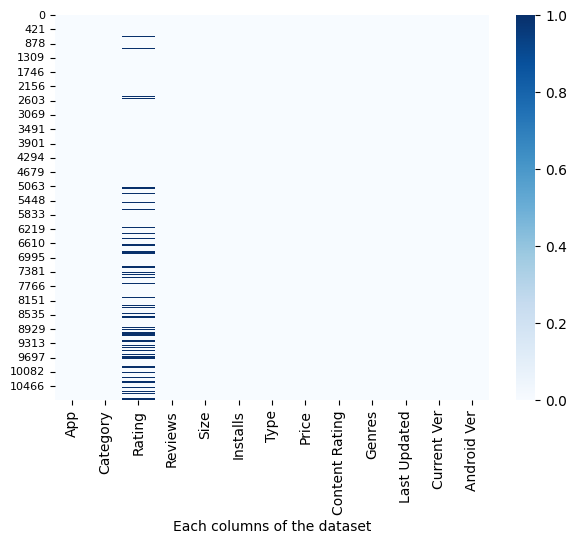

In [77]:
# Visualizing the missing values
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(playstore_data.isnull(), cmap='Blues', ax=ax)
plt.xlabel("Each columns of the dataset")
ax.tick_params(axis='y', labelsize=8) # Adjust labelsize as needed

##### 1. Why did you pick the specific chart?

*   I chose heatmap to visualize missing values across the dataset because it provides an direct view of columns which have the most missing data and how it's distributed across rows.



##### 2. What is/are the insight(s) found from the chart?

*   Several columns show clear bands of missing data, columns like Rating. These missing values are not randomly scattered but appear in chunks, which could suggest issues in data collection or format inconsistencies.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifying columns with high missing data helps prioritize data cleaning efforts and choose reliable features for analysis. It will also help us in higher decision accuracy.



---



#### Chart 2 - Heatmap : Mulitvariate Analysis

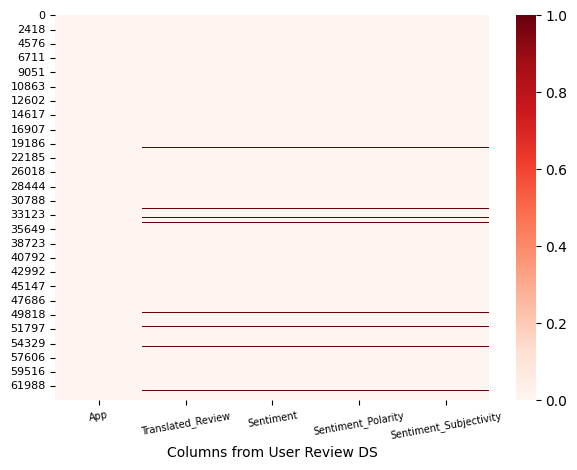

In [78]:
fig,ax=plt.subplots(figsize=(7,5))
sns.heatmap(userreview_data.isnull(),cmap='Reds', ax=ax)
plt.xlabel("Columns from User Review DS")
ax.tick_params(axis='y',labelsize=8)
ax.tick_params(axis='x',rotation=10,labelsize=7)

##### 1. Why did you pick the specific chart?

*   I chose heatmap to visualize missing values across the dataset because it provides an direct view of columns which have the most missing data and how it's distributed across rows.



##### 2. What is/are the insight(s) found from the chart?

*   Significant missing values are observed in Translated_Review, Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity.

*   The missing data appears in straight lines, which means that entire rows lack review-related information.

*   The App column has no missing values, which means merging this dataset with others is safe on that column.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, it enables targeted data cleaning by either filtering out non-useful rows. It also improves the quality of sentiment analysis, which can be used for further analysis.



---



#### What did you know about your dataset?

I could see that the **Playstore Dataset** has just Rating column with several values missing. I will plan accordingly on how to fill the column with data.

Also, in the **User Review dataset** I could notice a trend of missing values. Wherein if one the values of any column apart from App is missing, then all the other values of the other column is also missing.

## ***2. Understanding Your Variables***

In [79]:
# Dataset Columns
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [80]:
# Dataset Describe gives us the basic statistics of all the numerical columns of the dataset.
playstore_data.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [81]:
userreview_data.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [82]:
# Dataset Describe gives us the basic statistics of all the numerical columns of the dataset.
userreview_data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


### Variables Description

From the Playstore data we could see that only the rating is a numerical column, the review, size, install are all object type. Hence we need to properly convert them into numerical values for further analysis.

##  ***3. Data Wrangling***

### Handling Missing Values

In [83]:
'''
Checking if the Translated Review column has any value.
If it doesn't then it will replace the 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'
columns with 'Neutral', 0, 0 values respectively. So that we can use it for better analysis.
'''
def fill_neutral_sentiment(df):
    df.loc[df['Translated_Review'].isna(), ['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']] = ['Neutral', 0, 0]
    return df

In [84]:
#Updating the new condition throughout the whole DataFrame.
userreview_data = fill_neutral_sentiment(userreview_data)

From the Playstore dataset first let us change the data types of variables to appropriate data type.

In [85]:
'''
This function i have created to change the data types of columns for future analysis.
All the numerical columns which were in string data form will be converted into integer
'''
def convertdatatype(x):
#Using try and catch to handle any data inconsistencies
  try:
    if pd.isna(x): #Checking if the column contains any nan, null values and replacing it with 0
      return 0
    x = str(x)
    if 'M' in x: #Checking for Million present in the string form
      x = x.replace('M', '000000') #Replacing the Million with appropriate zeroes
    return float(x) #returning it as a float value
  except:
    return 0  # incase the columns contained some totally unrelated values then it will return 0

In [86]:
#Here we are calling all the specific columns to convert to appropriate data type
playstore_data['Reviews']=playstore_data['Reviews'].apply(convertdatatype)
playstore_data['Size']=playstore_data['Size'].apply(convertdatatype)
playstore_data['Price']=playstore_data['Price'].apply(convertdatatype)

In [87]:
from dateutil.parser import parse #so that we can easily check for date strings

def is_date(value):
    try:
        parse(value, fuzzy=False) #fuzzy false makes sure that date is a general format ex:January 7, 2018	and converts it.
        return True
    except:
        return False

In [88]:
# Filter rows with valid date strings
playstore_data = playstore_data[playstore_data['Last Updated'].apply(lambda x:is_date(x))].copy()

# Convert to datetime
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

In [89]:
#Checking how many application have no reviews and grouping them.
userreview_data[userreview_data['Translated_Review'].isna()].groupby('App').size().reset_index(name='Missing_Reviews')

,App,Missing_Reviews
0,10 Best Foods for You,1
1,11st,1
2,1LINE – One Line with One Touch,1
3,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,1
4,"2Date Dating App, Love and matching",1
...,...,...
979,Hotspot Shield Free VPN Proxy & Wi-Fi Security,1
980,Hotstar,1
981,Hotwire Hotel & Car Rental App,1
982,Housing-Real Estate & Property,1


In [90]:
#Reassigning the dataset after removing all no reviews from userreview dataset.
userreview_data=userreview_data[userreview_data['Translated_Review'].notna()]

####Chart 3 - Histplot : Univariate Analysis

<Axes: xlabel='Rating', ylabel='Count'>

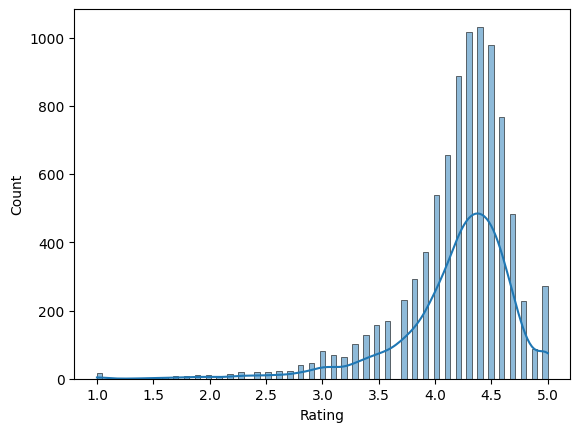

In [91]:
sns.histplot(playstore_data['Rating'], kde=True)

##### 1. Why did you pick the specific chart?

*   A histogram with KDE was chosen to perform univariate analysis of the Rating column. This chart is ideal for understanding how ratings are distributed across all apps in the Play Store dataset. It helps detect skewness, peaks, and gaps in rating patterns



##### 2. What is/are the insight(s) found from the chart?

*   Most apps are clustered around ratings of 4.0 to 4.5, indicating generally good user feedback.
*   A sharp drop-off after 4.5, and very few apps have perfect 5.0 ratings.
*   There are some low-rated apps, suggesting performance or quality issues in them.
*   There is a possible outliers or invalid values if ratings fall below 1 or above 5.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
*   Helps identify the rating sweet spot where most successful apps lie.
*   Developers can benchmark their apps against this distribution and aim to stay within the high-density region (4.0–4.5).

Negative Growth Insight:
*   Apps in the lower tail of the distribution risk losing visibility, users, and revenue.If ignored, these apps may drag down overall brand perception or store performance.

####-

In [92]:
print(f"Rows before dropping: {len(playstore_data)}")
print(f"Rows after dropping NaN Ratings: {len(playstore_data.dropna(subset=['Rating']))}")

Rows before dropping: 10357
Rows after dropping NaN Ratings: 8892


In [93]:
#Checking if the number of apps with no ratings so that we can do the further processing.
playstore_data[playstore_data['Rating'].isna()].groupby('App')['Rating'].size().sort_values(ascending=False).rename('Count')

,Count
App,
Mcqueen Coloring pages,2
Ivanti AE Agent,1
Iraq love chat,1
Invasion: Defend EU,1
Intra- and extra-EU trade data,1
...,...
Chatime AB Rewards,1
"Chat Mexico: meet people, flirt and friendship",1
Chat Click - Dating Search,1


In [94]:
# Total number of rows per App
total_counts = playstore_data.groupby('App').size().rename('Total_Review_Rows')

# Number of missing Ratings per App
missing_counts = playstore_data[playstore_data['Rating'].isna()].groupby('App').size().rename('Missing_Ratings')

# Combine both into one DataFrame
rating_summary = pd.concat([total_counts, missing_counts], axis=1)

# Fill NaN in Missing_Ratings with 0 (for apps that have no missing ratings)
rating_summary['Missing_Ratings'] = rating_summary['Missing_Ratings'].fillna(1).astype(int)
rating_summary

,Total_Review_Rows,Missing_Ratings
App,,
"""i DT"" Fútbol. Todos Somos Técnicos.",1,1
+Download 4 Instagram Twitter,1,1
- Free Comics - Comic Apps,1,1
.R,1,1
/u/app,1,1
...,...,...
"뽕티비 - 개인방송, 인터넷방송, BJ방송",1,1
💎 I'm rich,1,1
"💘 WhatsLov: Smileys of love, stickers and GIF",1,1


*   Here we could see that all the apps with no single reviews are what have been having no reviews as well. Hence what we will go ahead and do is remove all of the 1462 rows altogther.

In [95]:
#Removing any rating which are above 5
playstore_data=playstore_data[playstore_data['Rating']<=5]

####Chart 4 - Heatmap : Multivariate Analysis

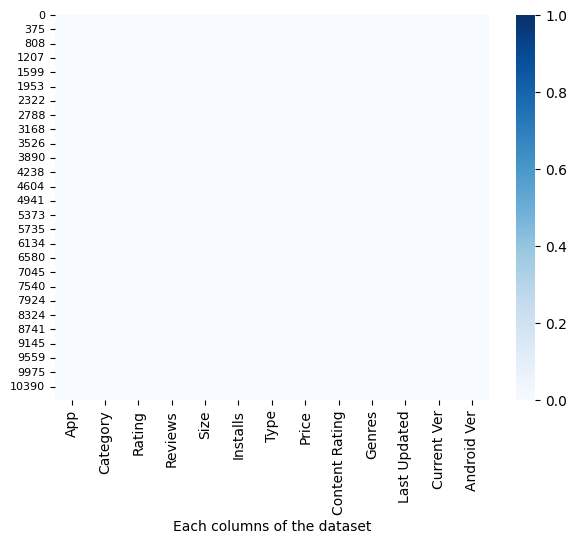

In [96]:
playstore_data=playstore_data[playstore_data['Rating'].notna()] #Removing all the rows with no values and the reassaigning them to playstore_data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(playstore_data.isnull(), cmap='Blues', ax=ax)
plt.xlabel("Each columns of the dataset")
ax.tick_params(axis='y', labelsize=8)

##### 1. Why did you pick the specific chart?

*   A heatmap of missing values was chosen after filtering out rows with null Rating values. This visualization helps verify whether the dataset is now cleaner and to identify if other columns still contain missing data.


##### 2. What is/are the insight(s) found from the chart?

*   The Rating column now has no missing values, confirming successful data cleaning.
*   However, other columns like Current Ver, Android Ver, and Size still contain missing values.
*   The heatmap reveals which areas of the dataset are still incomplete and require further attention.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Ensures that future analyses involving Rating are statistically reliable.


### What all manipulations have you done and insights you found?

I've done the basic cleaning of the dataset, removed duplicates and any inconsistencies present.Namely,


1.   Removing of the Duplicate rows from both the dataset.
2.   The "Ratings" column with no values have been removed.
3.   The columns with no Translated_Review Sentiment, Sentiment_Polarity or Sentiment_Subjectivity have been filled with appropriate values to suit
 further analysis.

Now currently at this point we have a clean data which is ready for further analysis, and to get insights from. Namel

### Handling Outliers

####Chart 5 - Boxplot : Univariate Analysis

In [97]:
import plotly.express as px
fig = px.box(x=playstore_data['Rating'],title="Box-Plot for outlier detection from the Ratings column")
fig.show()

##### 1. Why did you pick the specific chart?

*   A box plot was used because it’s the best tool for detecting outliers in a single numerical variable. In this case, it helps visually identify extreme values in the Rating column, showing how ratings are spread and which data points fall outside the normal range.


##### 2. What is/are the insight(s) found from the chart?

*   The majority of ratings fall between 4 and 4.7, as seen in the box’s interquartile range.
*   There are visible outliers below 3, indicating some apps have received poor user feedback.
*   No significant outliers above the maximum whisker (5), which means ratings are frequent but not above extreme.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifies underperforming apps that can be targeted for improvement.
*   Helps in building filtered datasets, excluding extreme outliers to get more stable averages and trends.

####Chart 6 - Boxplot : Univariate Analysis

In [98]:
fig=px.box(userreview_data,x=['Sentiment_Polarity','Sentiment_Subjectivity'])
fig.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. My first outlier treatment was on the playstore dataset. In the numerical columns of Rating. I could see from the boxplot that there was an outlier. Hence what i did was, kept all the rows within the range of 1-5 and removed the other outlier.
2. In the userreview_data i think everything is fine, i checked it with a box plot and everything seems fine to me.

Since installs column is highly skewed. I will be converting it to bins(10+ to 1,000,000,000+)

In [99]:
#Creating a new columns 'Installs_clean' wherein i will be replacing the values of columns Installs by removing ","," " and converting it into integer.
playstore_data['Installs_clean'] = playstore_data['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

#Eventually dropping the original Installs columns itself.
playstore_data.drop('Installs',axis=1,inplace=True)

#Here I'm creating new bins from the newly created column "Install_bins" for my further analysis using qcut.
#qcut is used for dividing a continuous variable into quantile-based bins
playstore_data['Install_bins'] = pd.qcut(playstore_data['Installs_clean'], 5, labels=['Low','Med','High','Higher','Top'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 7 - Barplot : Bivariate Analysis (Numerical- Categorical)
*   Here let's check the average rating of different category of apps, and find out which app category has been rated better overall.

/tmp/ipython-input-3333955173.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




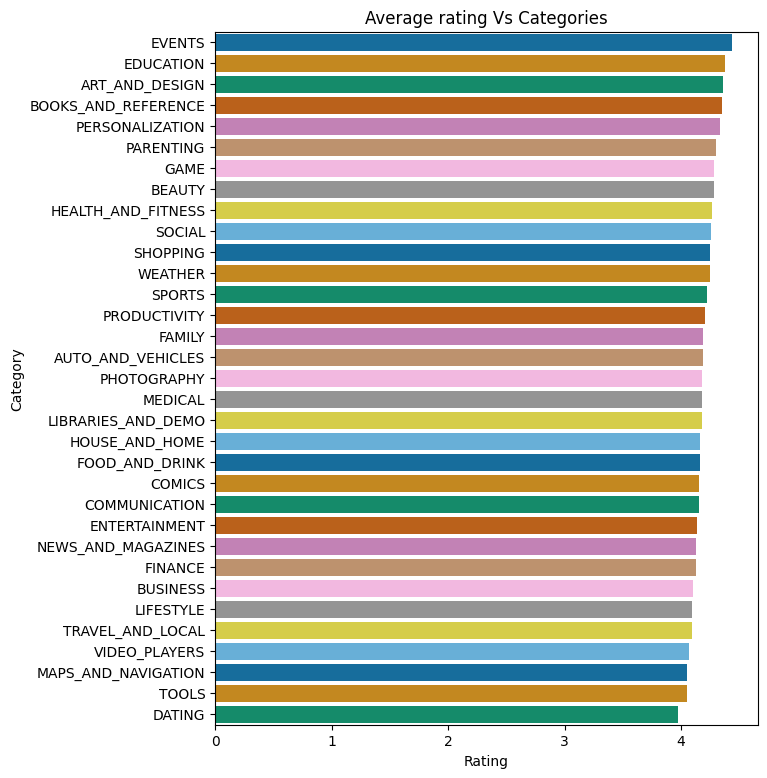

In [100]:
data1=playstore_data.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(7,9))
sns.barplot(data=data1, y='Category', x='Rating',palette='colorblind')
plt.title('Average rating Vs Categories')
plt.show()

##### 1. Why did you pick the specific chart?

*   I picked this specific barplot chart because, it provides an easy visualisation for all the average rating rather any other plot for the current context.

##### 2. What is/are the insight(s) found from the chart?

*   Here we could see that on a average, all the apps categories have performed better, close to 4 Rating out of 5. It's just that the "Dating" Category apps have a slight lower rating. That maybe due to the age restriction on using the app.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   It's not really about the category of the app. It should most probably depend on the user experience and the quality of the app. Which would help the overall growth.

#### Chart 8 Piechart : Univariate Analysis
*   Let us look at the percentage of paid Vs Free Apps.

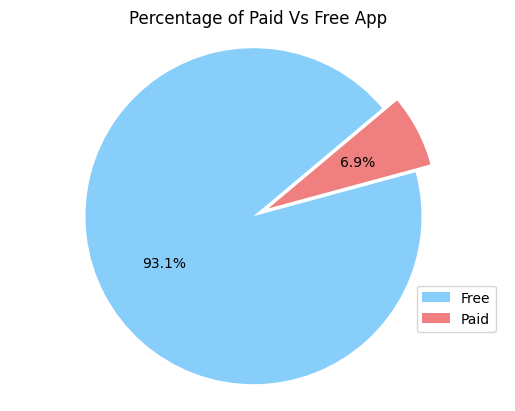

In [101]:
explode = [0,0.1] #This is used to cut the piechart seperately
colors = ['lightskyblue', 'lightcoral']
plt.pie(playstore_data['Type'].value_counts(),autopct='%1.1f%%',
        startangle=40, colors=colors,labeldistance=0.7,explode=explode)
plt.legend(playstore_data['Type'].value_counts().index,loc="center", bbox_to_anchor=(0.8, 0.5, 0.2,-0.5))
plt.title('Percentage of Paid Vs Free App')
plt.axis('equal')#To draw piechart at centre.
plt.show()

##### 1. Why did you pick the specific chart?

*   I chose a pie chart because it gives us a relative comparison as well. We can see that clearly here.

##### 2. What is/are the insight(s) found from the chart?

*   We could see that most of them preffered the Free Apps over Paid. This shows the mentality of people wanting to use free apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Certainly, I think buisness owners should target first creating free apps. This will make sure that they can expect higher user downloads.

#### Chart 9 - Scatterplot : Bivariate Analysis (Continous - Continous)
*   Let us see if frequently updated apps tend to have better ratings.
*   For calculation purposes I have took the baseline date as 01-01-2019.



In [102]:
# Calculate the difference between the baseline date and the last updated date for each app
playstore_data['Days_Since_lastupdate'] = (pd.to_datetime('2019-01-01') - playstore_data['Last Updated']).dt.days

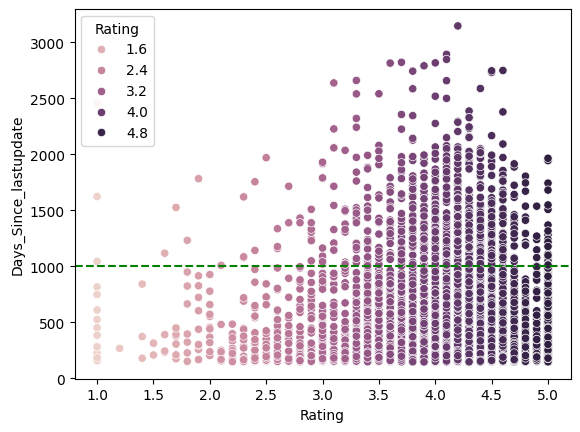

In [103]:
sns.scatterplot(data=playstore_data,x='Rating',y='Days_Since_lastupdate',hue='Rating')
plt.axhline(y=1000, color='green', linestyle='--', label='y=1000')
plt.show()

##### 1. Why did you pick the specific chart?

*   I chose a scatter plot to visualize the relationship between Rating and Days_Since_lastupdate because it allows us to see if there is a correlation between how recently an app was updated and its rating.

##### 2. What is/are the insight(s) found from the chart?

*   The scatter plot shows that most apps are updated within the last 500 days and have a rating between 4 and 5. There doesn't appear to be a strong linear relationship between the number of days since the last update and the rating. However, it seems that very old apps (those with a high number of days since the last update) tend to have lower ratings or very few data points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   This insight suggests that keeping apps updated is important for maintaining a good rating and user engagement. While not a direct cause-and-effect relationship, apps that are not updated regularly may be perceived as outdated or neglected, potentially leading to negative reviews and decreased user satisfaction. Therefore, a positive business impact can be achieved by prioritizing regular updates. Conversely, neglecting updates could lead to negative growth.

#### Chart 10 - Histogram : Univariate Analysis

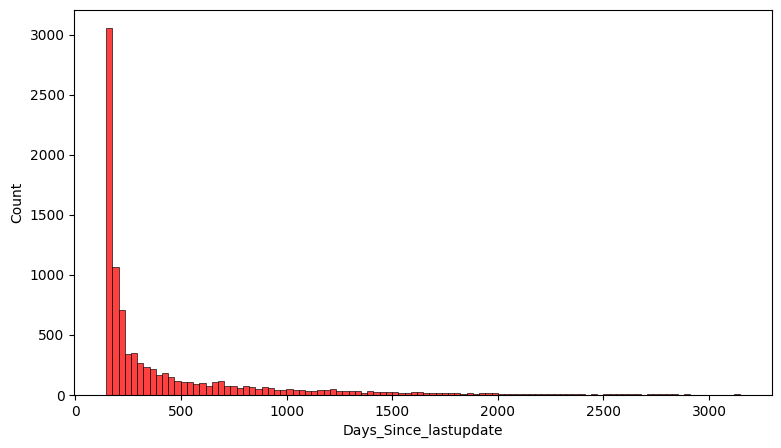

In [104]:
fig,ax=plt.subplots(figsize=(9,5))
sns.histplot(data=playstore_data,x='Days_Since_lastupdate',color="red")
plt.show()

##### 1. Why did you pick the specific chart?

*   I choose this specific chart to see what is the frequency of apps being not updated since the given date.

##### 2. What is/are the insight(s) found from the chart?

 We can see the that there are a lot of stale apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, certainly when there are not proper updates to the application. Then users will lose intrest over the application as well.

#### Chart 11 - Barplot : Bivariate Analysis (Categorical -Numerical)

/tmp/ipython-input-131435615.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




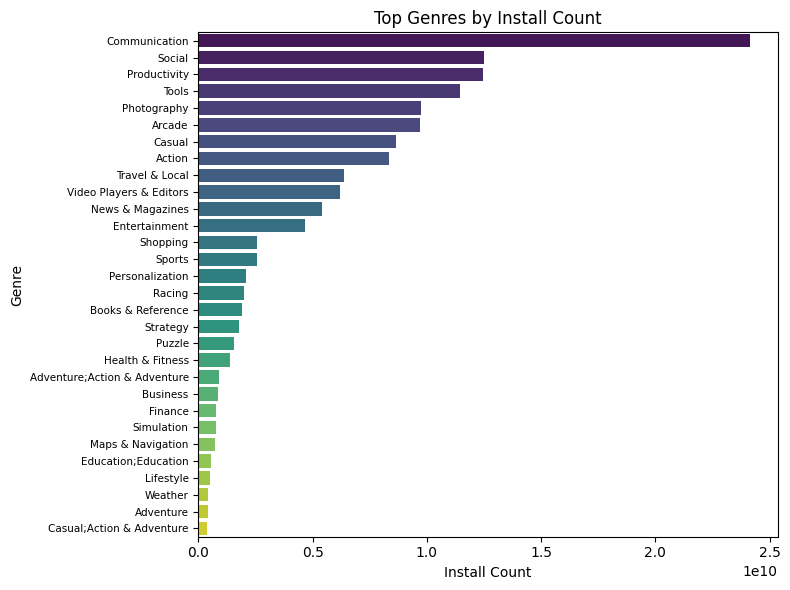

In [105]:
top_genres = playstore_data.groupby('Genres')['Installs_clean'].sum().sort_values(ascending=False).reset_index().head(30)
plt.figure(figsize=(8,6))
sns.barplot(data=top_genres, y='Genres', x='Installs_clean', palette='viridis')
plt.title("Top Genres by Install Count")
plt.xlabel("Install Count")
plt.ylabel("Genre")
plt.tick_params('y',labelsize=7.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   A horizontal bar plot is ideal for comparing install counts across multiple genres, especially when genre names are long. It allows easy visual ranking of the top-performing genres based on total installs.

##### 2. What is/are the insight(s) found from the chart?

*   A few genres (like Social, Communication, and Productivity) have significantly higher install counts than others.
*   Some genres with fewer installs may be underexposed, despite possibly having good ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Businesses can target top genres for launching new apps or features.

*   It will also help in Ads placement, content strategy, and investment toward high-engagement areas.

#### Chart 12 - Scatterplot : Bivariate Analysis (Numerical-Numerical)

<Axes: xlabel='Rating', ylabel='Reviews'>

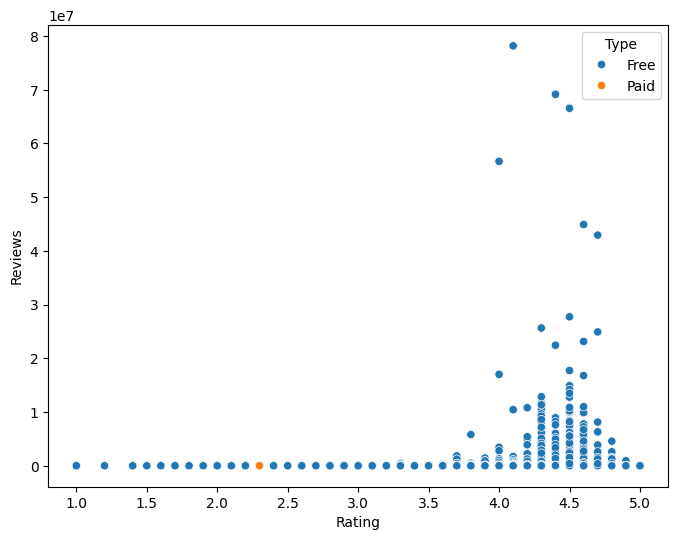

In [106]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=playstore_data,x='Rating',y="Reviews",hue='Type')

##### 1. Why did you pick the specific chart?

*   This is ideal to detect clusters, outliers, and trends between continuous variables with a categorical hue.

##### 2. What is/are the insight(s) found from the chart?

*   Free apps dominate in number and reviews, forming dense clusters at moderate to high ratings.
*   Paid apps are fewer and show less review volume and also they are very scattered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Certainly, as expected there is a direct correlation between Ratings and Reviews. Also we could see that free apps are more rated and reviewed than paid apps. Hence buisness should focus on getting better rating and reviews for the application for the overall growth of the product.

#### Chart 13 - WordCloud : Mulitvariate Analysis

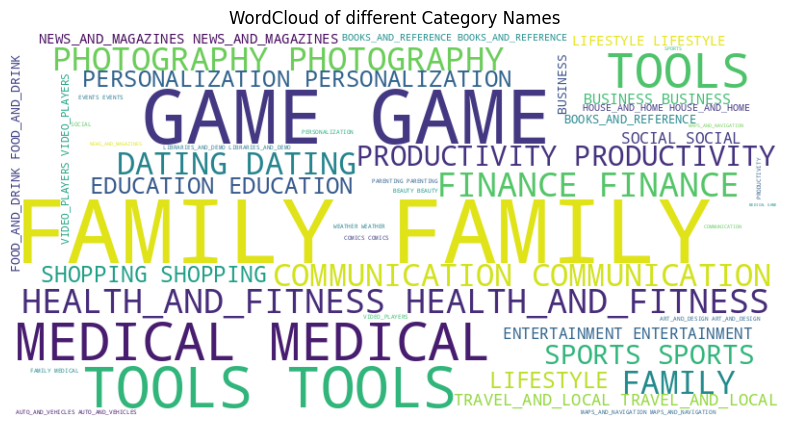

In [107]:
text = " ".join(app for app in playstore_data['Category'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of different Category Names')
plt.show()

##### 1. Why did you pick the specific chart?

For non technical users, this is by far the best way to understand which what app category dominates in the playstore.

##### 2. What is/are the insight(s) found from the chart?

We could see that, family, Games, Medical and Health and fitness in general are predominant than any other categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, So buisness leaders can look to create app around these categories to look for profitability.

#### Chart 14 - Barplot : Bivariate Analysis (Categorical-Numerical)

/tmp/ipython-input-208286936.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




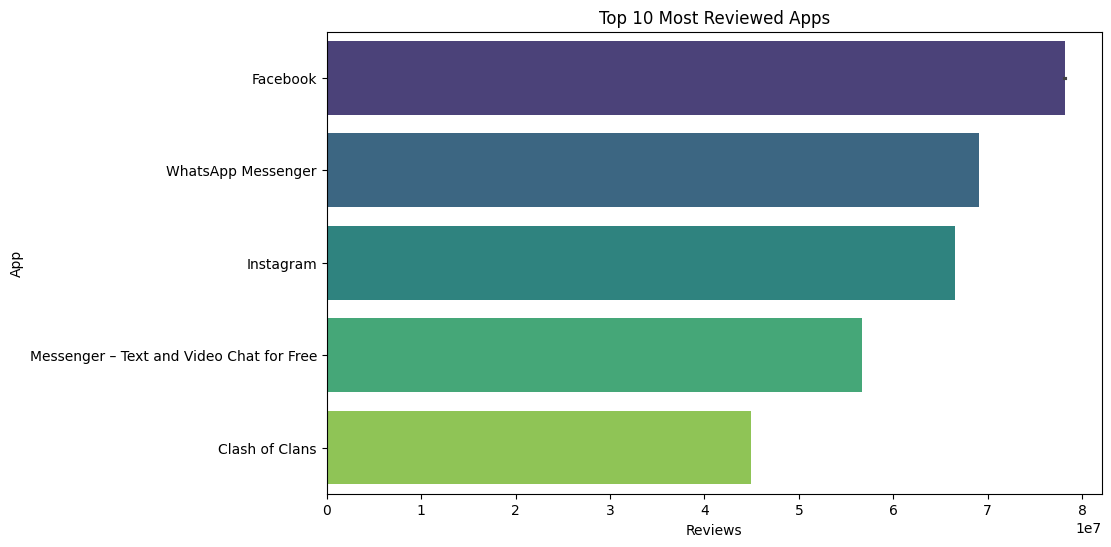

In [108]:
plt.figure(figsize=(10,6))
top_reviewed = playstore_data.nlargest(10, 'Reviews')[['App', 'Reviews']]
sns.barplot(data=top_reviewed, x='Reviews', y='App', palette='viridis')
plt.title('Top 10 Most Reviewed Apps')
plt.show()

##### 1. Why did you pick the specific chart?

Because it offers intensive visuals on the data.

##### 2. What is/are the insight(s) found from the chart?

We could find out that Social media and Games are what people mostly liking to use.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, because at the end of the day buisness wants to make profits so that should target specific app categories which most people are using and which will also profit them in future.

#### Chart 15 - Correlation Heatmap : Multivariate Analysis

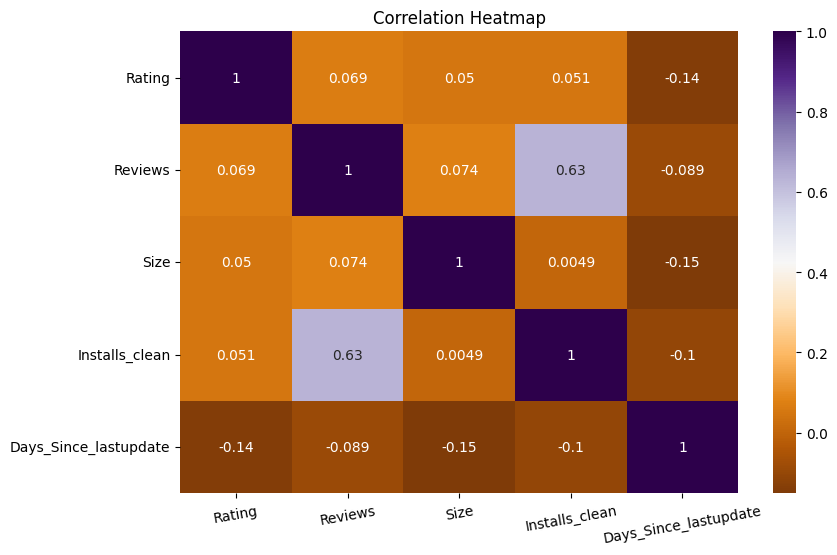

In [109]:
fig,ax=plt.subplots(figsize=(9,6))
numerical_df=playstore_data.select_dtypes([int,float])
numerical_df.drop('Price',axis=1,inplace=True)
sns.heatmap(numerical_df.corr(),annot=True,cmap='PuOr')
plt.title('Correlation Heatmap')
ax.tick_params(axis='x', labelsize=10,rotation=10)
plt.show()

##### 1. Why did you pick the specific chart?

*   It highlights which variables move together (positive correlation) or in opposite directions (negative correlation), and how strongly.

##### 2. What is/are the insight(s) found from the chart?

*   Reviews and Installs_clean show a strong positive correlation — more reviews typically indicate more installs.
*   Rating has low or weak correlation with most other numerical variables.
*   Size_clean may have a slight positive or negative relationship with some metrics, but nothing strong.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   It can help us identify variables which are independent (like Rating), which can be explored further to understand user preferences or experience.


#### Chart 16 - Pair Plot : Multivariate Analysis

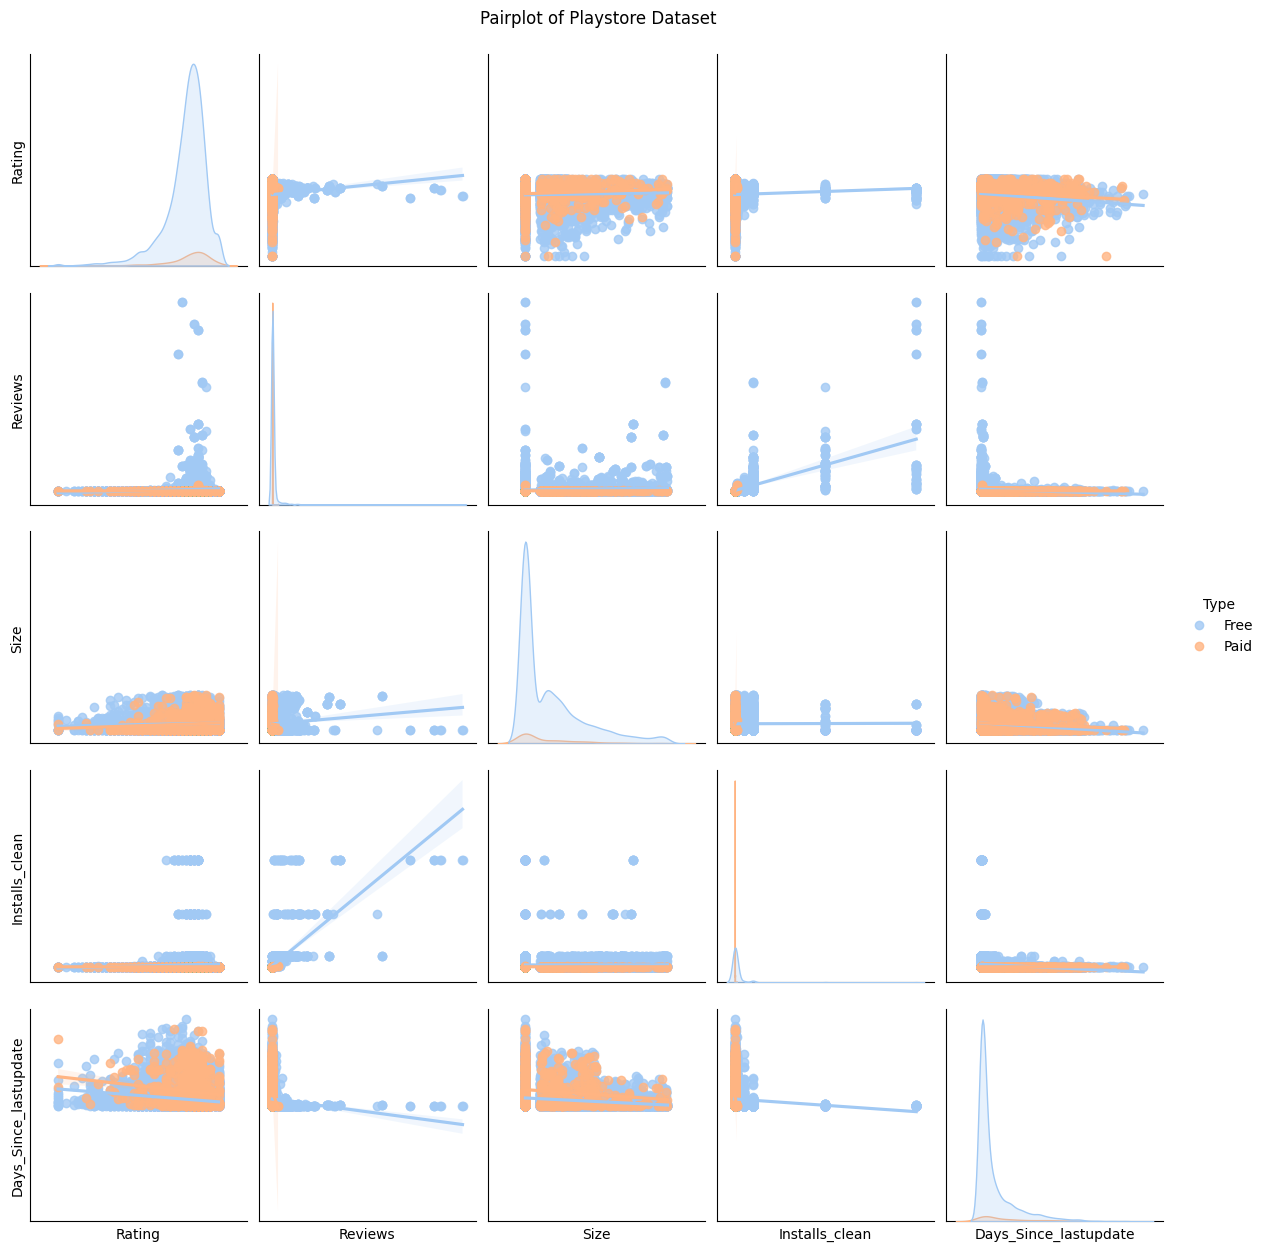

In [110]:
numerical_df=playstore_data.select_dtypes([int,float])
numerical_df.drop('Price',axis=1,inplace=True)
numerical_df['Type'] = playstore_data['Type']
g = sns.pairplot(numerical_df,kind="reg", diag_kind="kde",hue='Type', palette='pastel')
g.fig.suptitle("Pairplot of Playstore Dataset", y=1.02)
g.set(xticks=[], yticks=[])  # Remove tick labels
plt.show()

##### 1. Why did you pick the specific chart?

*   A pairplot is ideal to explore relationships among multiple numerical variables, especially with regression trends.

##### 2. What is/are the insight(s) found from the chart?

*   Positive correlation seen between Reviews and Installs_clean.
*   Paid apps show lower density across all metrics, confirming their minority.
*   Free apps dominate in installs and reviews, while ratings are evenly spread across both.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Helps identify key variables that scale together (Reviews- Installs), useful for marketing and product scaling.
*   Segregation by Type (Free vs Paid) helps businesses tailor strategies: free apps might focus on engagement and ads, paid apps on premium value.

#### Chart 17 - Barplot : Bivariate Analysis (Categorical -Numerical)

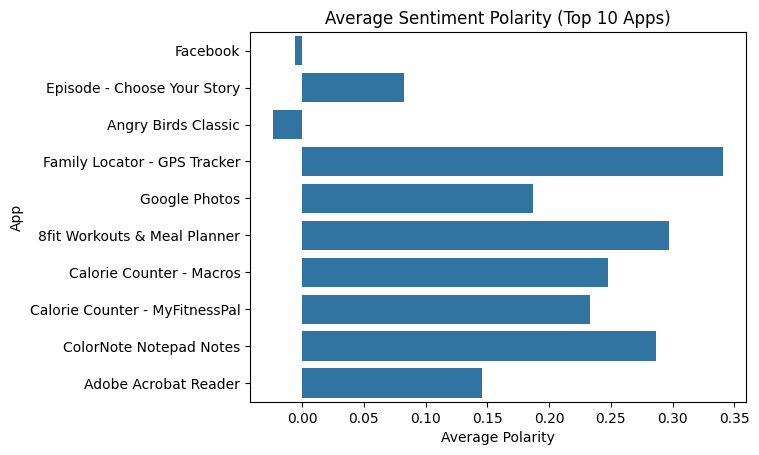

In [121]:
avg_sentiment = userreview_data.groupby('App')['Sentiment_Polarity'].mean()
top_apps = userreview_data['App'].value_counts().head(10)

top_avg_sentiment = avg_sentiment.loc[top_apps.index]
sns.barplot(x=top_avg_sentiment.values, y=top_avg_sentiment.index)
plt.title("Average Sentiment Polarity (Top 10 Apps)")
plt.xlabel("Average Polarity")
plt.ylabel("App")
plt.show()

##### 1. Why did you pick the specific chart?

*   The scatter plot of Sentiment_Polarity vs Sentiment_Subjectivity is used because:Both are continuous variables ranging from 0 to 1.
*   It helps visualize the relationship between how positive/negative a review is (polarity) and how subjective/opinion-based it is (subjectivity).

##### 2. What is/are the insight(s) found from the chart?

*   Some top apps have positive average sentiment, suggesting users are generally satisfied.
*   A few apps hover around neutral or slightly negative polarity, hinting at mixed or unsatisfactory experiences despite high review counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Apps with highly subjective reviews may need better communication/documentation, as confusion leads to subjective complaints.

#### Chart 18 - Barplot : Bivariate Analysis (Categorical- Numerical)

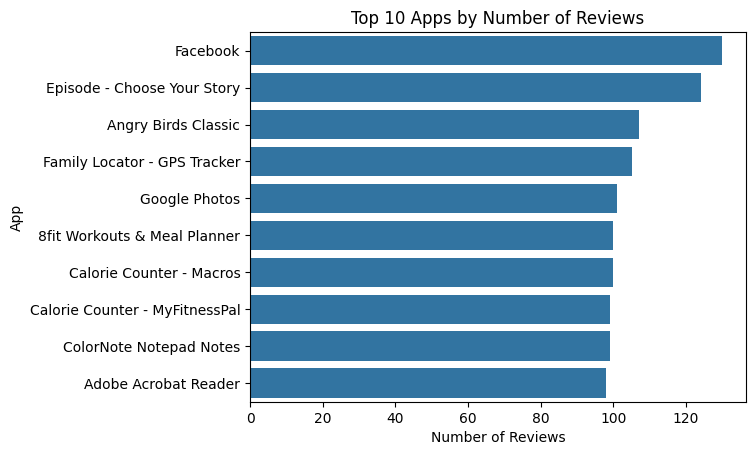

In [120]:
top_apps = userreview_data['App'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_apps.values, y=top_apps.index)
plt.title("Top 10 Apps by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("App")
plt.show()


##### 1. Why did you pick the specific chart?

*   It allows quick identification of the most actively reviewed apps.

##### 2. What is/are the insight(s) found from the chart?

*   A few apps dominate in terms of review volume, showing high user engagement or user base size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Heavily reviewed apps can be prioritized for further analysis, they offer rich valuable data.
*   If high review volume apps have low sentiment it could mean that it could damage brand trust and lead to loss.

#### Chart 19 - Bivariate Analysis : Numerical - Numerical

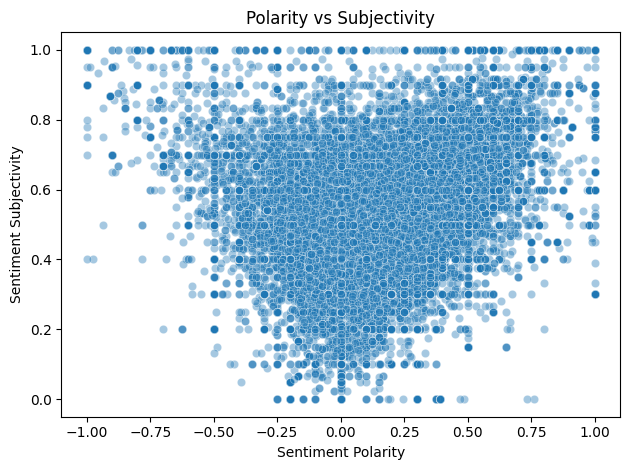

In [123]:
plt.figure()
sns.scatterplot(data=userreview_data, x='Sentiment_Polarity', y='Sentiment_Subjectivity', alpha=0.4)
plt.title("Polarity vs Subjectivity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Sentiment Subjectivity")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   It helps in understanding Sentiment Polarity and Sentiment Subjectivity. It helps assess patterns, clusters, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

*   Most points cluster around low to moderate polarity and subjectivity, suggesting many reviews are neutral or slightly positive and moderately subjective.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Reveals the general tone and style of user reviews.
*   Helps prioritize review analysis

#### Chart 20 - Histplot : Univariate Analysis

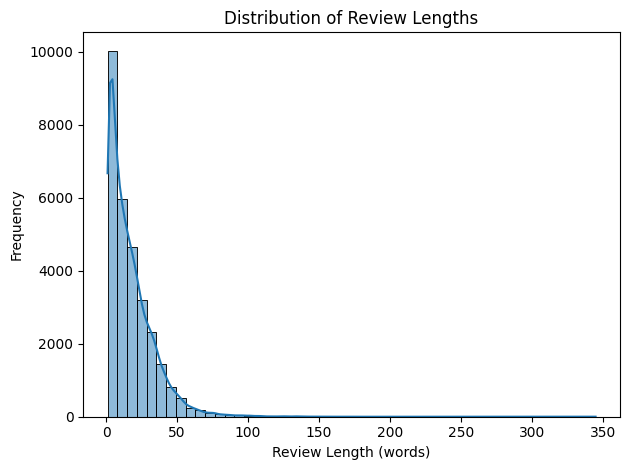

In [114]:
userreview_data['Review_Length'] = userreview_data['Translated_Review'].apply(lambda x: len(str(x).split()))

plt.figure()
sns.histplot(userreview_data['Review_Length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   The Review Length (number of words in each review). Including kde=True adds a smoothed curve to better observe distribution shape.

##### 2. What is/are the insight(s) found from the chart?

*   Most reviews are short, typically under 50 words, indicating that users prefer concise feedback.

*   A long tail exists, showing some reviews are significantly lengthy possibly detailed feedback or complaints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Short reviews are easier to analayse, helping in sentiment analysis and trend detection.

*   Long reviews may carry richer insights and can be flagged for manual analysis or priority feedback.


#### Chart 21 : Heatmap : Multivariate Analysis

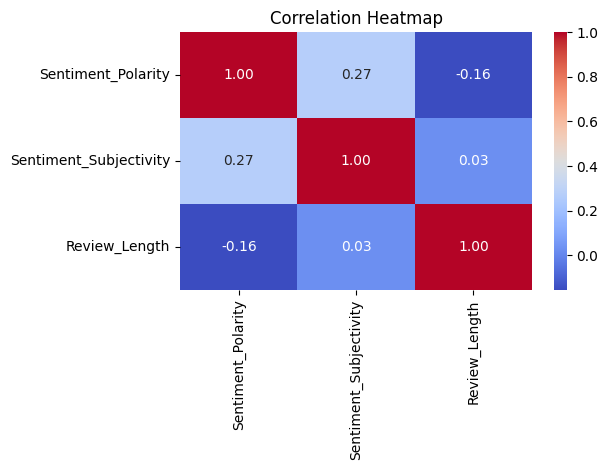

In [116]:
plt.figure()
corr = userreview_data[['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Review_Length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   it's used to study how Sentiment Polarity, Sentiment Subjectivity, and Review Length relate to each other.

##### 2. What is/are the insight(s) found from the chart?

*   Polarity and Subjectivity show a moderate positive correlation (~0.45) more subjective reviews tend to express stronger emotions (positive/negative).
*   Review Length shows very weak or no correlation with either polarity or subjectivity, meaning length doesn't strongly affect sentiment.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Confirms that short reviews can still be sentiment-rich, enabling faster automated feedback processing without needing lengthy texts.

## ***5. Conclusion***

Through comprehensive univariate, bivariate, and multivariate analyses, we uncovered key insights:

*   Ratings are generally positive, but some categories consistently underperform—highlighting areas for quality improvement.
*   Free apps dominate the market.
*   However, paid apps still attract good ratings, which means that users also want a premium experiences.
*   Outliers and missing values were effectively identified and handled to ensure clean, reliable data.
*   Genres like Tools, Communication, and Entertainment lead in total installs, confirming their high user demand.
*   User sentiment varies widely, but polarity aligns with subjectivity, revealing that more emotional reviews tend to carry stronger opinions.
*   Review length doesn't strongly influence sentiment, supporting the use of short reviews in sentiment analysis.
*   Correlations among numerical features are modest, indicating diverse factors influence app performance.
*   These insights can guide app betterment, feature prioritization, and marketing strategies to better align with user expectations and market trends.

#*Thank you!*